# My project title: Wine quality analysis 
This project is going to predict the quality of the wine before a wine taster gives his/her evaluation.

It may help wine manufacturers to develop new wine.

## Start to do data preparation

Let's prepare our notebook by importing the necessary libs 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Load and organize the data in a pandas data frame format. (red wine and white wine)

In [2]:
redwine_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
whitewine_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

redwine_table = pd.read_csv(redwine_link, ";", header=0)
whitewine_table = pd.read_csv(whitewine_link, ";", header=0)

# Concatenate two datasets vertically (red wine has the same columns as white wine)

wine = pd.concat([redwine_table, whitewine_table])

# Check and make sure the concatenation is correct
assert redwine_table.shape[0] + whitewine_table.shape[0] == wine.shape[0], 'merge error'
assert redwine_table.shape[1] == whitewine_table.shape[1] == wine.shape[1], 'merge error'


Now, let's check how the data is distributed on the combined wine DataFrame

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Show Information about wine DataFrame (columns and indexes)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


Show a summary statistics information

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Show best wine (quality =9)

In [6]:
wine[wine.quality == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


Show correlation matrix

In [7]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


## Start to Visualize datasets

First, newly make a new folder for saving all the plotting charts under this project

In [8]:
os.makedirs('plots/myproject', exist_ok=True)

Show correlation heap map for easy exploring

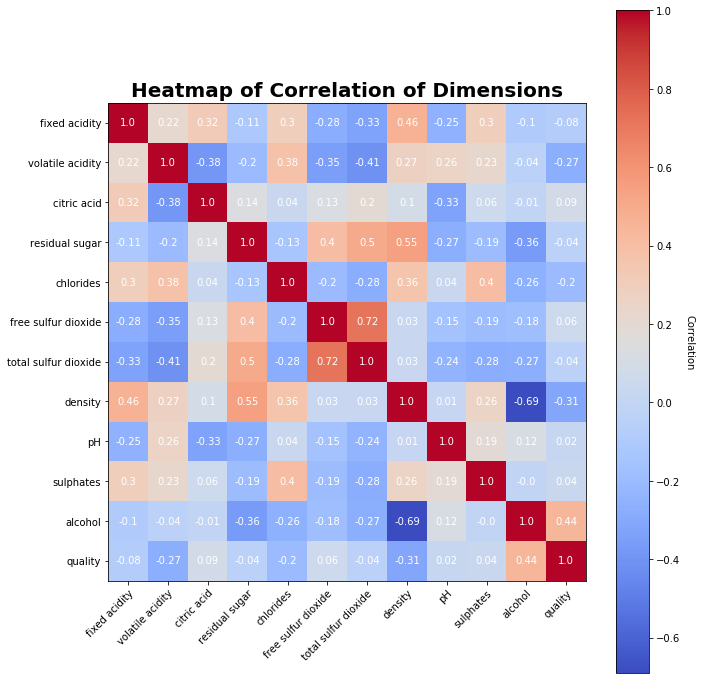

In [9]:
correlation = wine.corr().round(2)

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
im = axes.imshow(correlation, cmap="coolwarm")
cbar = axes.figure.colorbar(im, ax=axes)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
numrows = len(correlation.iloc[0])
numcolumns = len(correlation.columns)
axes.set_xticks(np.arange(numrows))
axes.set_yticks(np.arange(numcolumns))
axes.set_xticklabels(correlation.columns)
axes.set_yticklabels(correlation.columns)
plt.setp(axes.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(numrows):
    for j in range(numcolumns):
        text = axes.text(j, i, correlation.iloc[i, j], ha='center', va='center', color='w', size='medium')
axes.set_title('Heatmap of Correlation of Dimensions', fontdict={'fontsize': 20, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig(f'plots/myproject/wine_correlation_heatmap.png', format='png')
plt.show()

### Plotting by some line charts

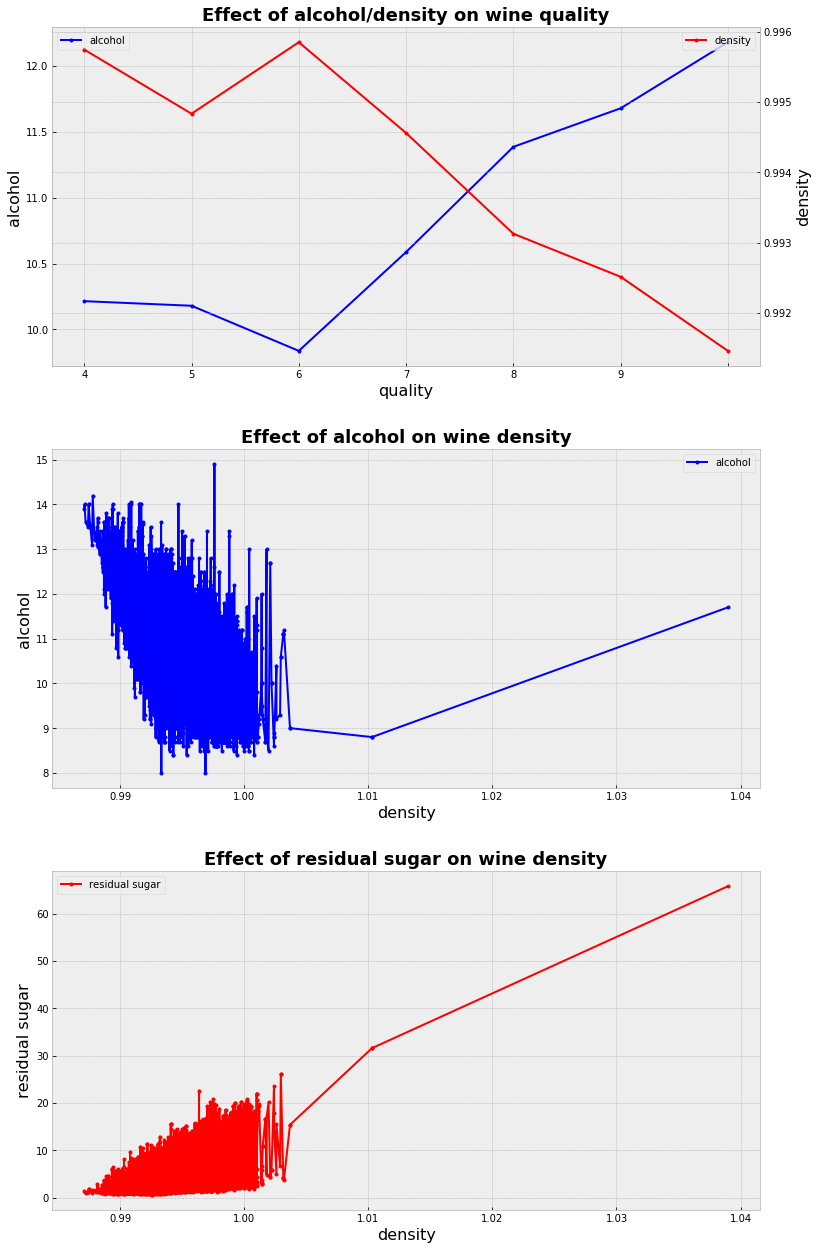

In [22]:
sorted_by_quality_df = wine.sort_values('quality')
quality_array = np.unique(sorted_by_quality_df['quality'])
alcohol_list = []
density_list = []

for quality in quality_array:
    alcohol_list.append(sorted_by_quality_df[sorted_by_quality_df['quality'] == quality]['alcohol'].mean())
    density_list.append(sorted_by_quality_df[sorted_by_quality_df['quality'] == quality]['density'].mean())

# Plotting the 1st sub line chart to show alcohol & density to quality
fig, ax1 = plt.subplots(3, 1, figsize=(12, 18))
ax1[0].plot(quality_array, alcohol_list, 'b.-', label="alcohol")
ax1[0].set_title('Effect of alcohol/density on wine quality', fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax1[0].set_xlabel('quality', fontdict={'fontsize': 16})
ax1[0].set_ylabel('alcohol', fontdict={'fontsize': 16})
ax1[0].set_xticklabels(quality_array)
ax1[0].legend()

# Density is not at the same scale of alcohol, so adding a y-axis label to secondary y-axis
ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(quality_array, density_list, 'r.-', label="density")
ax2.set_ylabel("density", fontdict={'fontsize': 16})
ax2.legend()

# Plotting the 2nd sub line chart to show alcohol to density
sorted_by_density_df = wine.sort_values('density')
ax1[1].plot(sorted_by_density_df['density'], sorted_by_density_df['alcohol'], 'b.-', label="alcohol")
ax1[1].set_title('Effect of alcohol on wine density', fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax1[1].set_xlabel('density', fontdict={'fontsize': 16})
ax1[1].set_ylabel('alcohol', fontdict={'fontsize': 16})
ax1[1].legend()

# Plotting the 3rd sub line chart to show residual sugar to density
ax1[2].plot(sorted_by_density_df['density'], sorted_by_density_df['residual sugar'], 'r.-', label="residual sugar")
ax1[2].set_title('Effect of residual sugar on wine density', fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax1[2].set_xlabel('density', fontdict={'fontsize': 16})
ax1[2].set_ylabel('residual sugar', fontdict={'fontsize': 16})
ax1[2].legend()
fig.tight_layout(pad=3.0)
plt.savefig(f'plots/myproject/alcohol_quality_lineChart.png', format='png')
plt.show()

### Plotting histogram chart

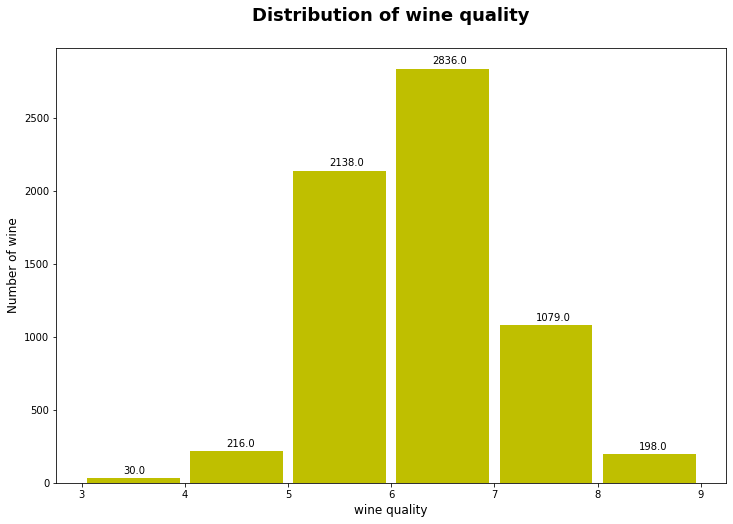

In [19]:
plt.figure(figsize=(12, 8))
sorted_by_quality_df = wine.sort_values('quality')
bins = np.unique(sorted_by_quality_df['quality'])
# display the count over the bar and "+0.4 & +30" is to adjust the coordinates to show text in center of the bar top.
winehist = plt.hist(wine.quality, bins=bins, color='y', rwidth=0.9)
for i in range(len(bins)-1):
    plt.text(winehist[1][i]+0.4, winehist[0][i]+30, str(winehist[0][i]), color='black', size='medium')

plt.xticks(bins)
plt.ylabel('Number of wine', fontdict={'fontsize': 12})
plt.xlabel('wine quality', fontdict={'fontsize': 12})
plt.title('Distribution of wine quality\n', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.savefig(f'plots/myproject/wine_quality_histogram.png', format='png')
plt.show()

### Plotting scatter chart

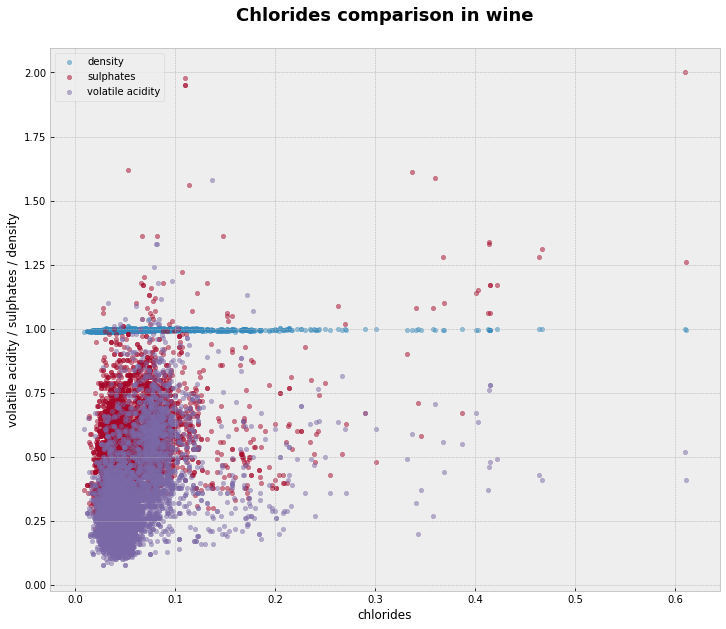

In [23]:
plt.style.use("bmh")
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
axes.scatter(wine['chlorides'], wine['density'], alpha=0.5, label='density', s=20)
axes.scatter(wine['chlorides'], wine['sulphates'], alpha=0.5, label='sulphates', s=20)
axes.scatter(wine['chlorides'], wine['volatile acidity'], alpha=0.5, label='volatile acidity', s=20)
axes.set_xlabel('chlorides')
axes.set_ylabel('volatile acidity / sulphates / density')
axes.set_title('Chlorides comparison in wine\n', fontdict={'fontsize': 18, 'fontweight': 'bold'})
axes.legend()
plt.savefig(f'plots/myproject/chlorides_comparision_scatter.png', format='png')
plt.show()

### Plotting pie chart

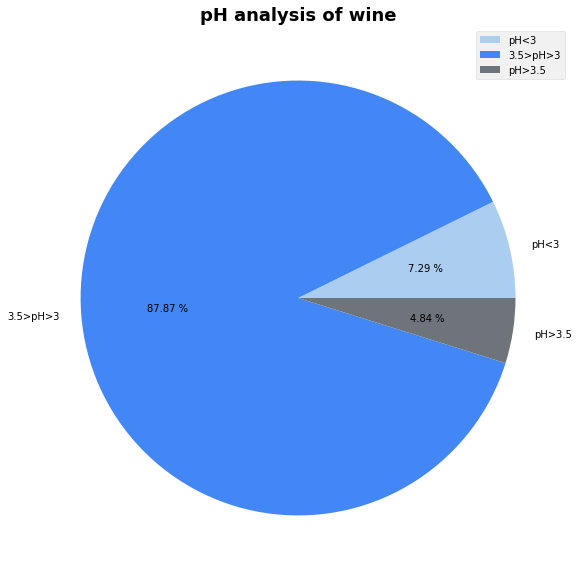

In [25]:
labels = ['pH<3', '3.5>pH>3', "pH>3.5"]

# google: color picker to get HEX# for customizing colors
colors = ['#abcdef', '#4287f5', '#6f747a']

low_pH = wine.loc[wine['pH'] < 3].count()[0]
medium_pH = wine.loc[(wine['pH'] > 3) & (wine['pH'] < 3.5)].count()[0]
high_pH = wine.loc[wine['pH'] > 3.5].count()[0]

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.pie([low_pH, medium_pH, high_pH], labels=labels, colors=colors, autopct='%.2f %%')
axes.set_title('pH analysis of wine', fontdict={'fontsize': 18, 'fontweight': 'bold'})
axes.legend()
plt.savefig(f'plots/myproject/pH_comparison_pieChart.png', format='png')
plt.show()